***Bike Sharing Demand Prediction***

**Step-1 : Import Libaries**

In [ ]:
import numpy as np
import pandas as pd
import gdown

In [ ]:
file_id="1EqLwOEdMk-lK5BDa2LD7hzNcki_liE5s"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "bike_sharing_data.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1EqLwOEdMk-lK5BDa2LD7hzNcki_liE5s
To: /content/bike_sharing_data.csv
100%|██████████| 57.5k/57.5k [00:00<00:00, 49.4MB/s]


'bike_sharing_data.csv'

In [ ]:
df=pd.read_csv("bike_sharing_data.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
df.shape

(730, 16)

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Assigning String values to  different Seasons instead of numeric values
df['season'] = df['season'].replace({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

In [ ]:
df['season'].astype('category').value_counts()

,count
season,
fall,188
summer,184
spring,180
winter,178


In [ ]:
# 0 = 2018, 1 = 2019 : Year
df['yr'].astype('category').value_counts()

,count
yr,
0,365
1,365


In [ ]:
#Assigning String values to  different Seasons instead of numeric values
def object_map_mnths(x):
  return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [ ]:
df[['mnth']] = df[['mnth']].apply(object_map_mnths)

In [ ]:
df['mnth'].astype('category').value_counts()

,count
mnth,
Aug,62
Dec,62
Jul,62
Jan,62
Oct,62
May,62
Mar,62
Apr,60
Nov,60


In [ ]:
df['holiday'].astype('category').value_counts()

,count
holiday,
0,709
1,21


In [ ]:
def str_map_weekday(x):
  return x.map({1:'Mon',2:'Tues',3:'Wed',4:'Thrus',5:'Fri',6:'Sat',0:'Sun'})

In [ ]:
df[['weekday']] = df[['weekday']].apply(str_map_weekday)

In [ ]:
df['weekday'].astype('category').value_counts()

,count
weekday,
Mon,105
Sat,105
Sun,105
Fri,104
Thrus,104
Tues,104
Wed,103


In [ ]:
df['workingday'].astype('category').value_counts()

,count
workingday,
1,499
0,231


In [ ]:
# 1 = clear, few clouds, partly cloudly
# 2 = Mist,Cloudy
# 3 = Light Snow, Heavy Rain
df['weathersit'] = df['weathersit'].replace({
    1: 'A',
    2: 'B',
    3: 'C',
})

In [ ]:
df['weathersit'].astype('category').value_counts()

,count
weathersit,
A,463
B,246
C,21


**2.Data Visualization**


In [ ]:
# import Libaries
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-120-fd46640fd7ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'])


<Axes: xlabel='temp', ylabel='Density'>

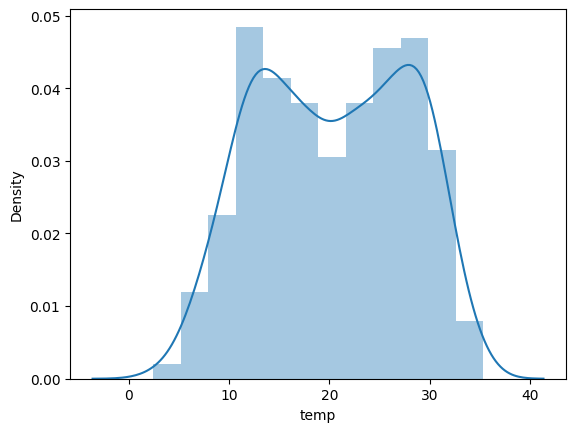

In [ ]:
# Temperature
sns.distplot(df['temp'])

<ipython-input-121-5d6d137c34a8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['atemp'])


<Axes: xlabel='atemp', ylabel='Density'>

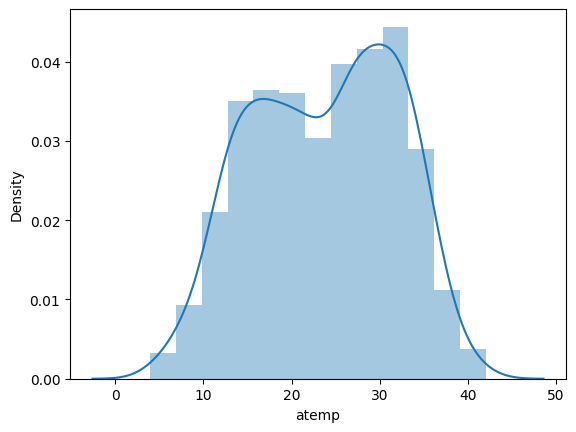

In [ ]:
# Actual Temperature
sns.distplot(df['atemp'])

<ipython-input-122-1e542f77f38b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['windspeed'])


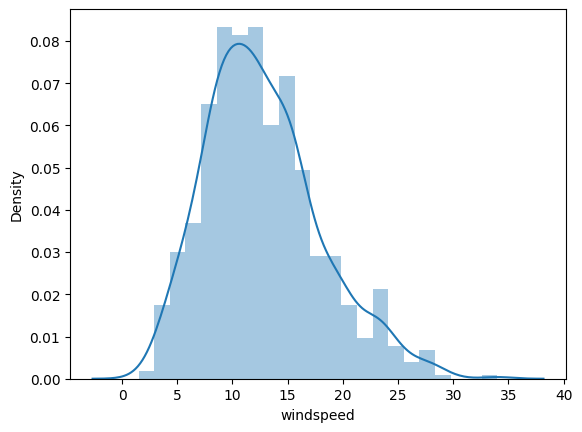

In [ ]:
# Wind Speed
sns.distplot(df['windspeed'])
plt.show()

<ipython-input-123-9ddb7e1bb048>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'])


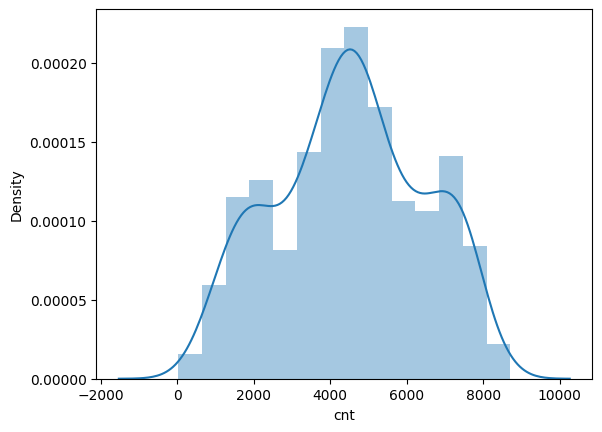

In [ ]:
# Target Variabe : count of total rental bikes including both casual and registered
sns.distplot(df['cnt'])
plt.show()

In [ ]:
# Converting date to date time format
df['dteday']=pd.to_datetime(df['dteday'], dayfirst=True, errors='coerce')

In [ ]:
print(df.dtypes)


instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [ ]:
df_categorical = df.select_dtypes(exclude=['float64','datetime64','int64'])
#df_categorical = df.select_dtypes(include=['object', 'category'])

In [ ]:
print(df_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [ ]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tues,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thrus,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


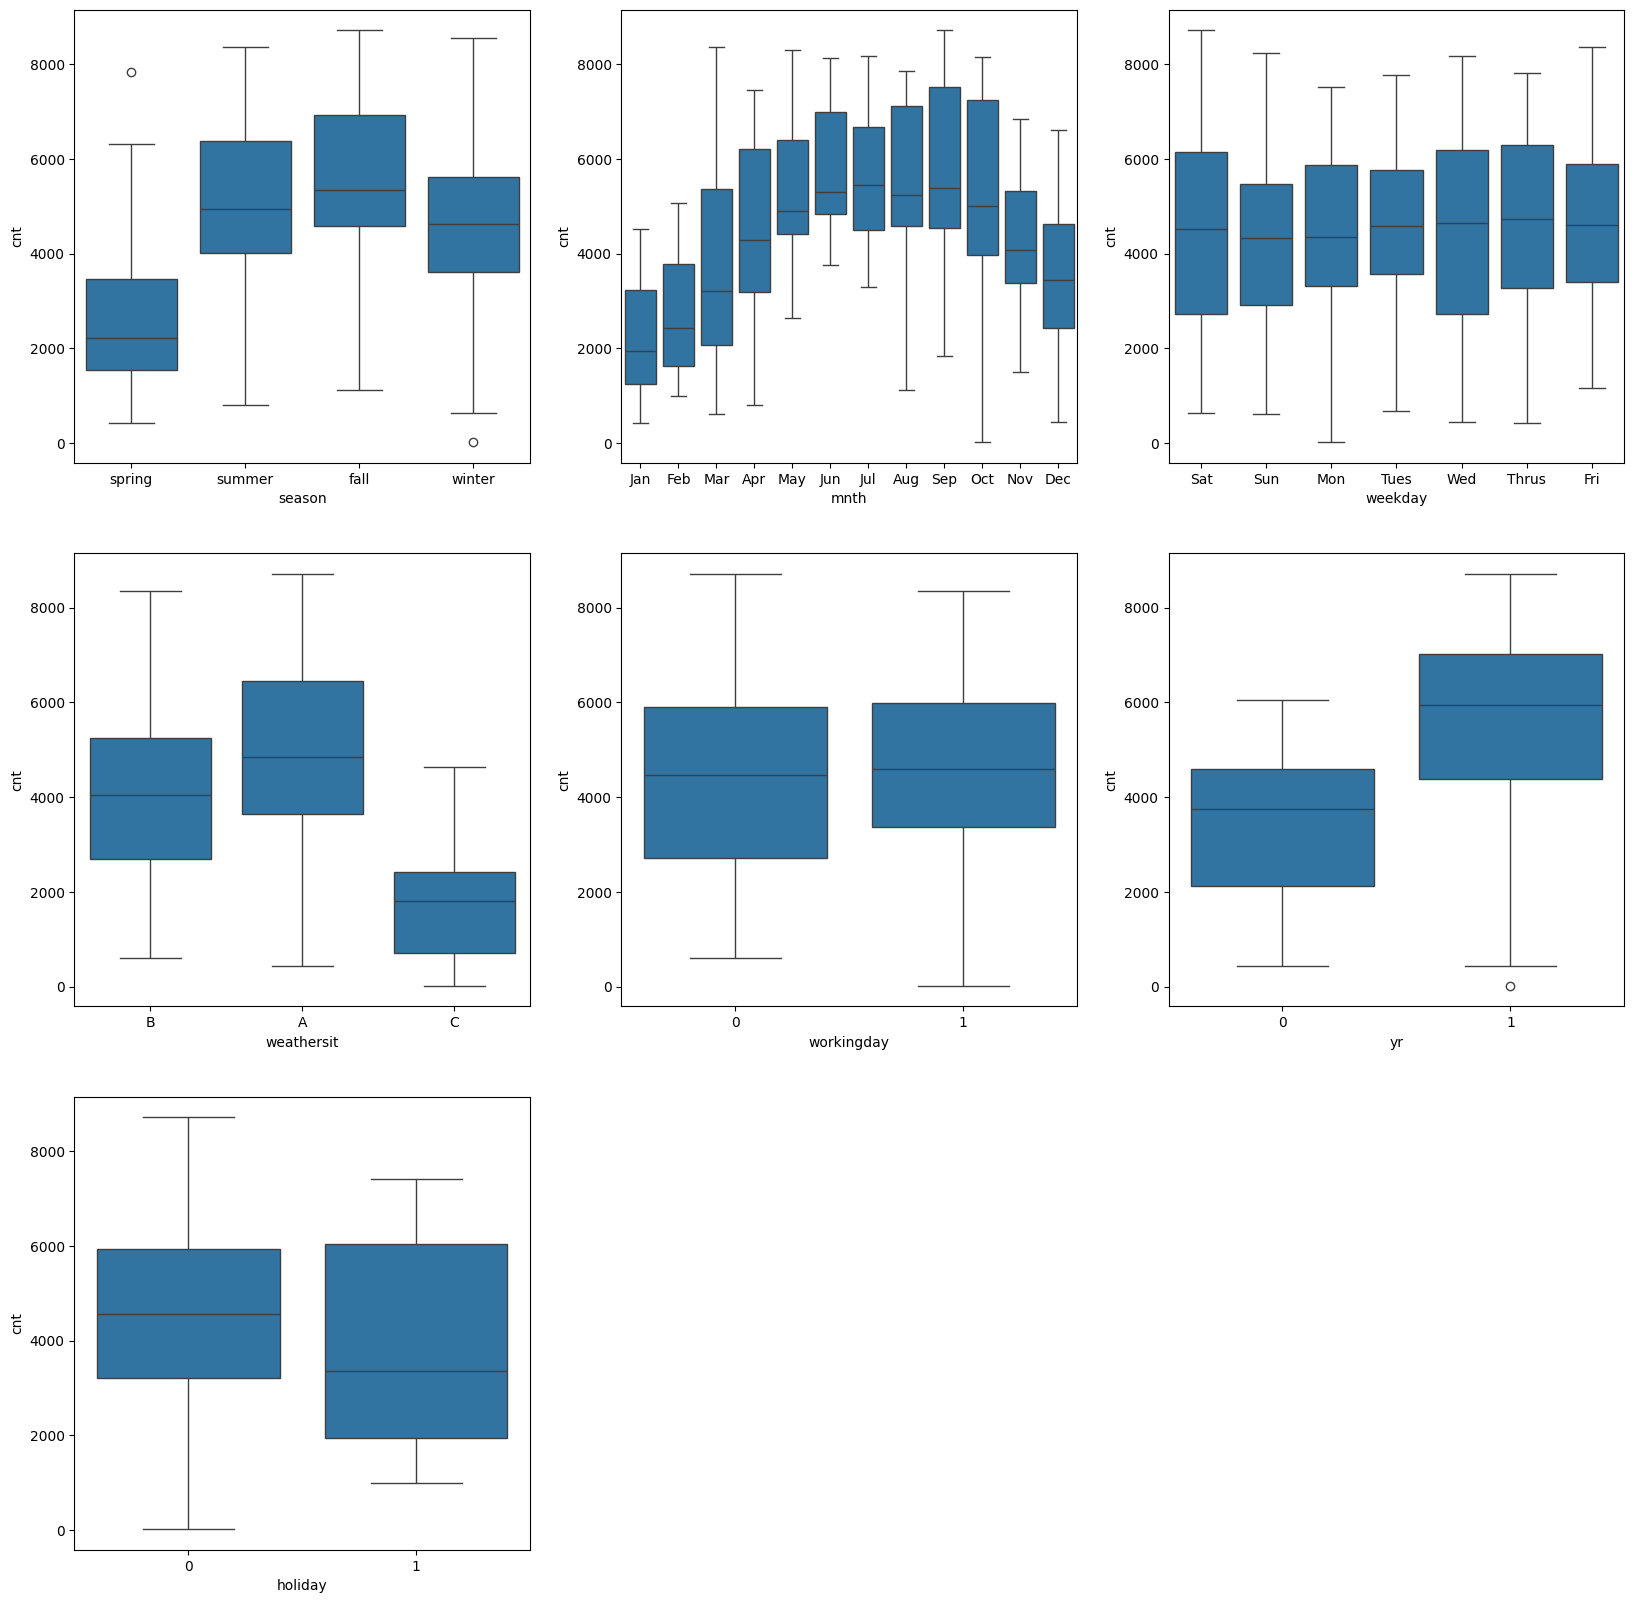

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

In [ ]:
intVarlist = ['casual','registered','cnt']
for var in intVarlist:
  df[var]=df[var].astype('float')

In [ ]:
df_numeric=df.select_dtypes(include=['float64'])
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


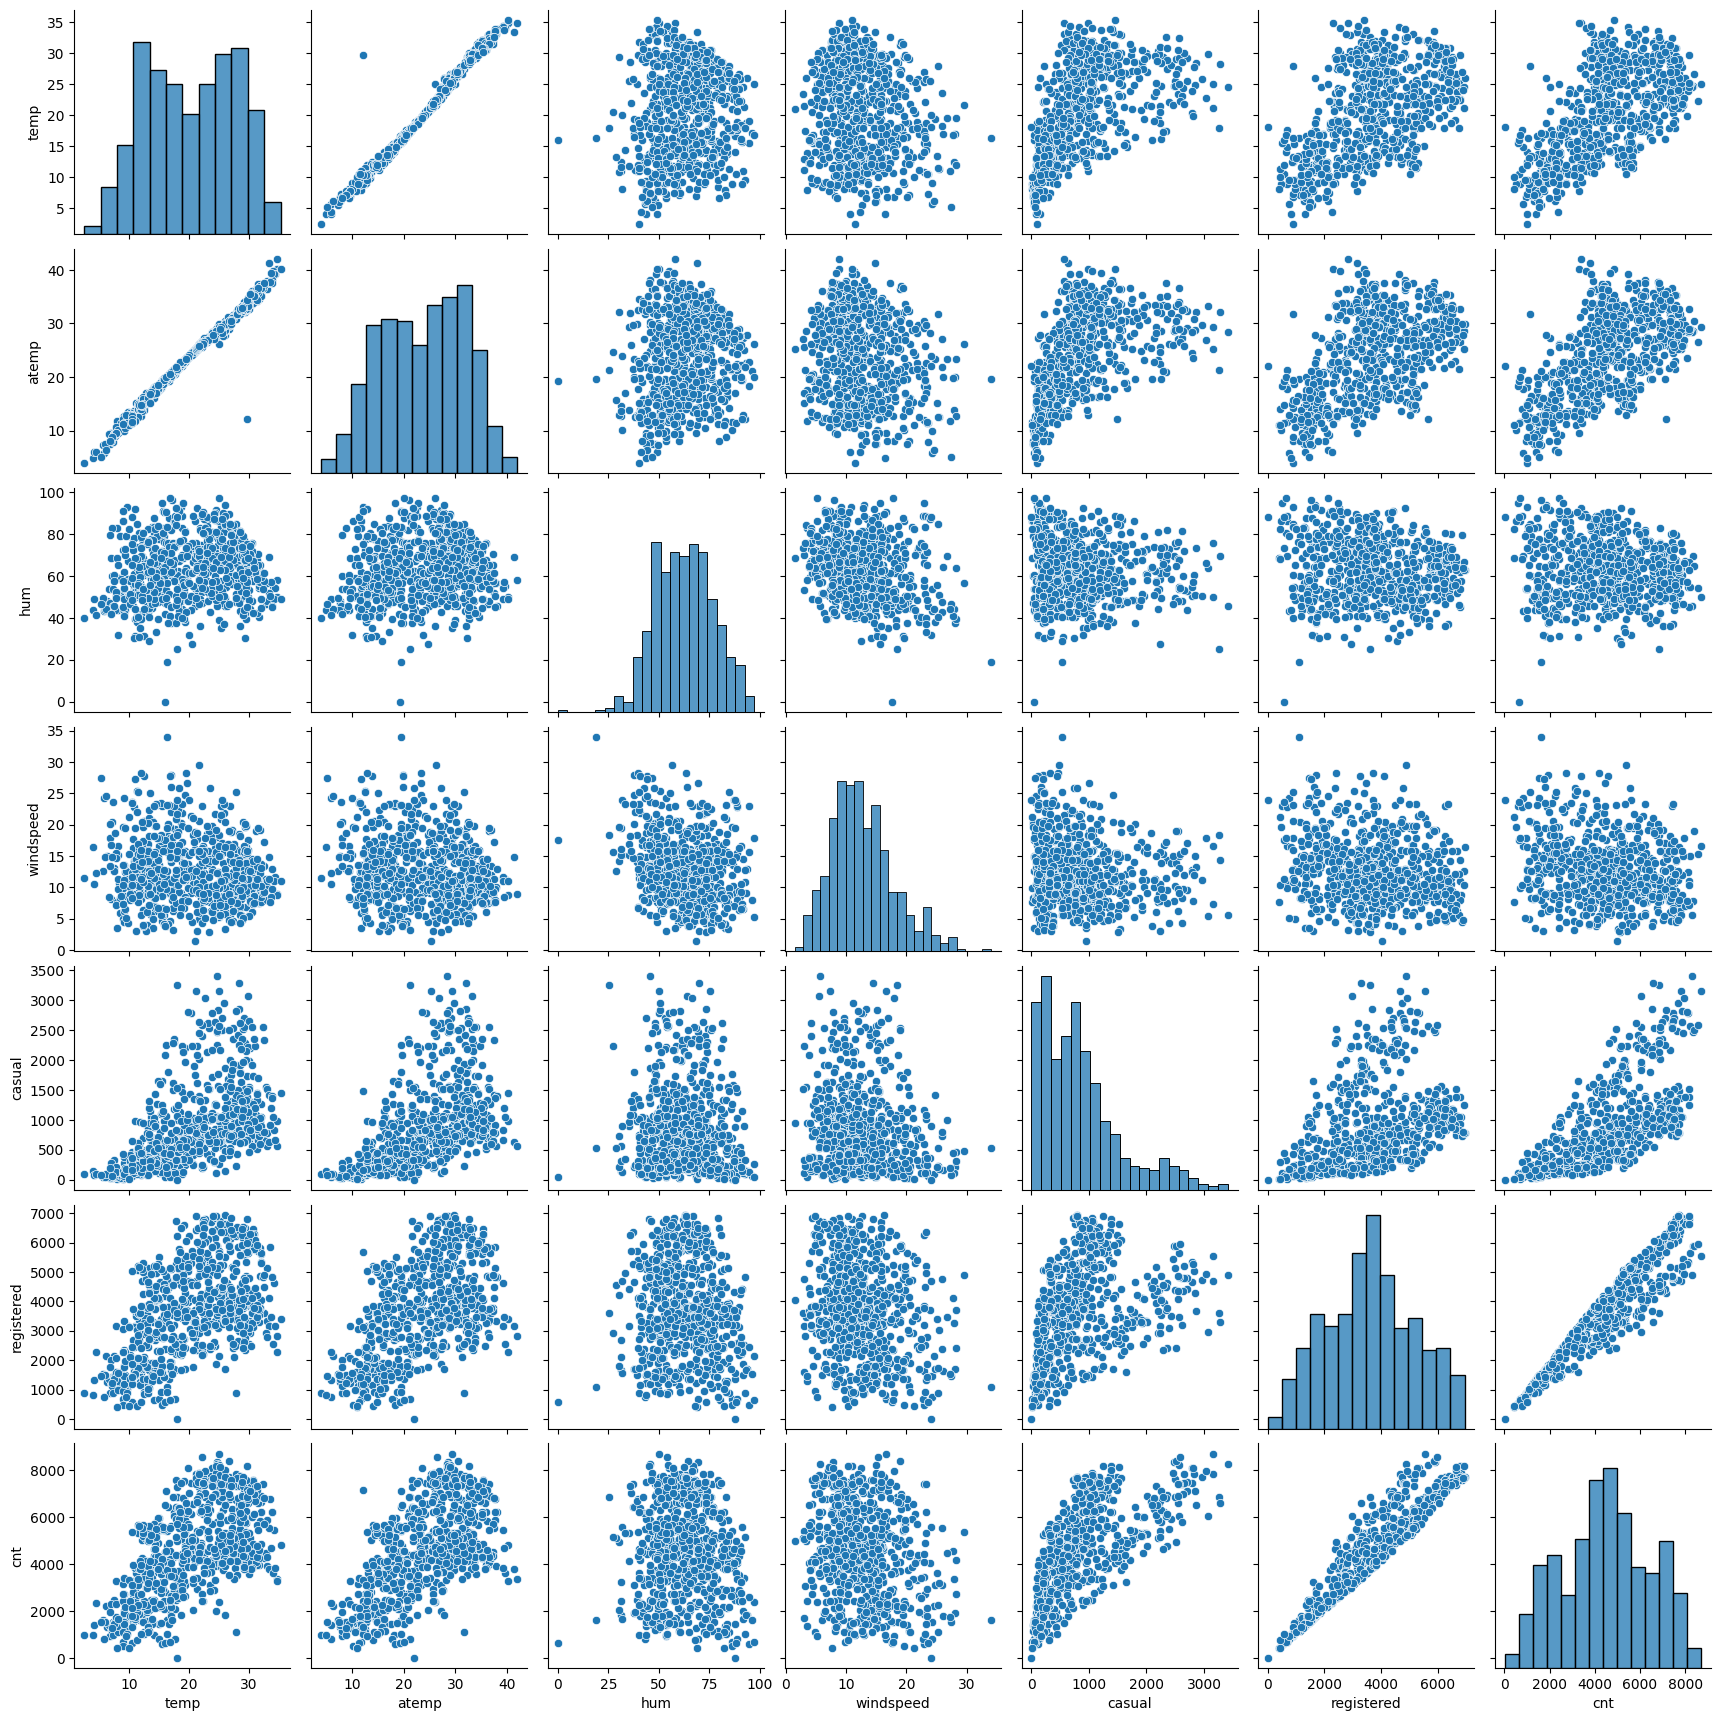

In [ ]:
sns.pairplot(df_numeric)
plt.show()

In [ ]:
cor=df_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


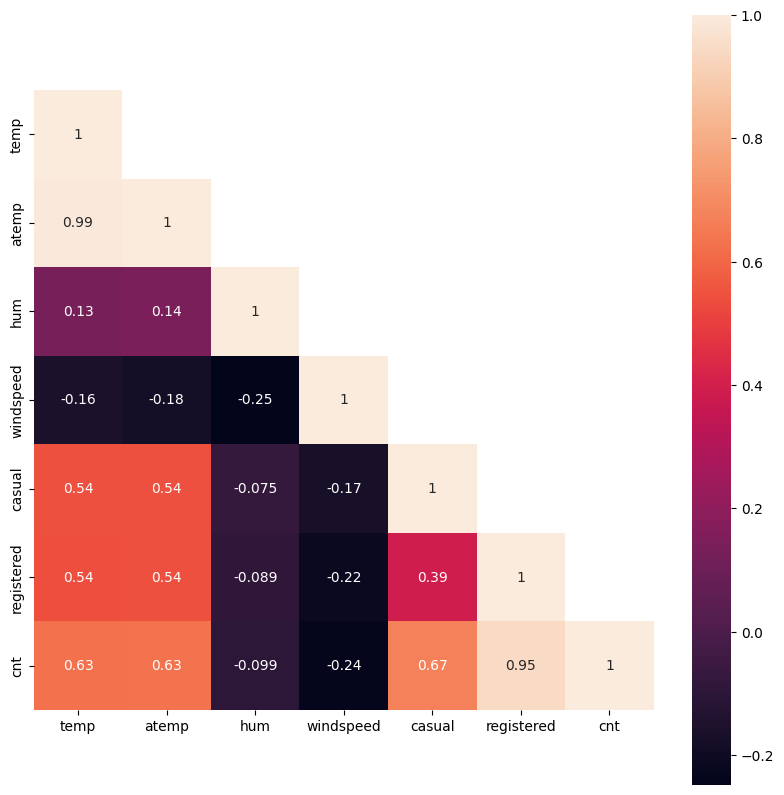

In [ ]:
# heatMap
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig, ax=plt.subplots()
fig.set_size_inches(10,10)
#plt.figure(figsize=(10,10))
sns.heatmap(cor,mask=mask, vmax=1,square=True, annot=True)
plt.show()

In [ ]:
# Removing atemp as it is highly corelated with temp
if 'atemp' in df.columns:
    df.drop('atemp', axis=1, inplace=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,spring,0,Jan,0,Tues,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


**3. Data Preparation**

In [ ]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tues,A
4,spring,Jan,Wed,A


In [ ]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies = df_dummies.astype(int)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Drop Categorical variable columns
df = df.drop(columns=[col for col in df_categorical.columns if col in df.columns], axis=1)
df
#df=df.drop(columns=list(df_categorical.columns),axis=1)

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [ ]:
# Concatenate dummy variables with the dataset
df=pd.concat([df,df_dummies],axis=1)
df

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,1,0,0,0,1,0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,...,0,0,0,0,0,1,0,0,1,0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,...,0,0,0,0,0,0,0,0,1,0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,...,0,0,0,1,0,0,0,0,1,0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df = df.drop(['instant','dteday'], axis=1, inplace= False)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


**4. Model Building and Evaluation**

In [ ]:
#import libaries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# Spilt th dataframe into train and test datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Apply Scaler to all columns except dummy variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [ ]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


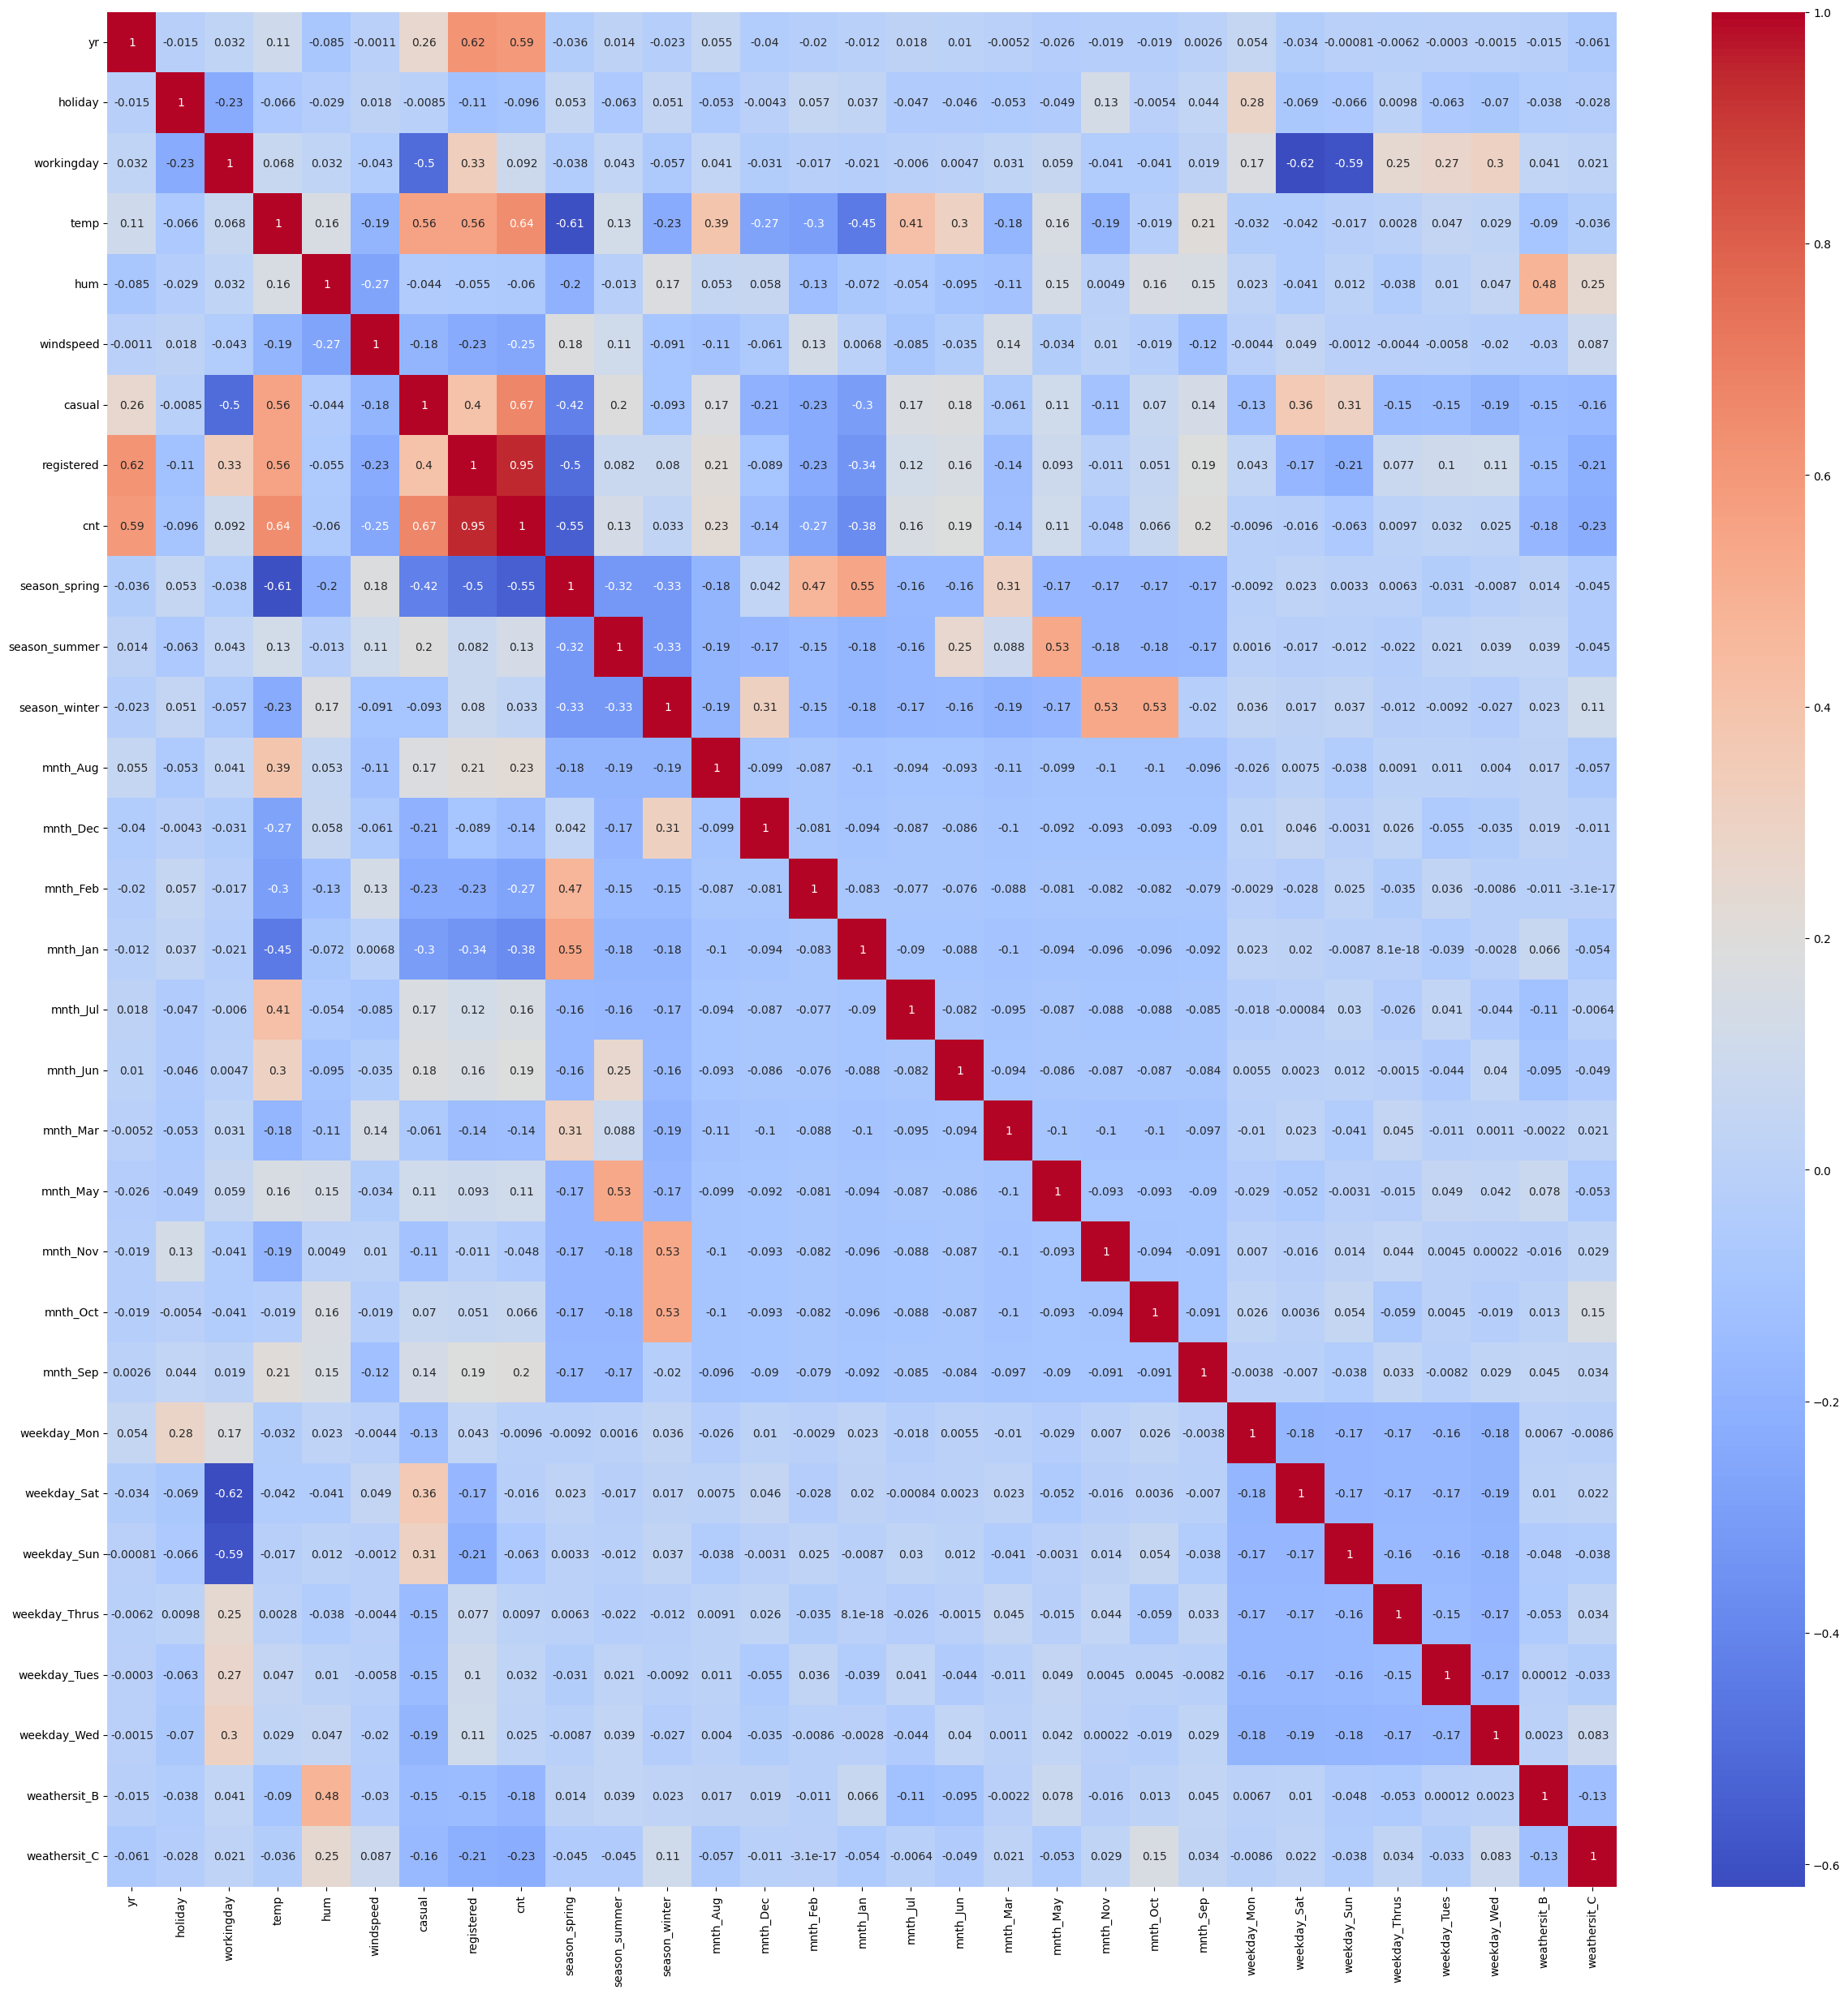

In [ ]:
# Checking the corelation coefficients to see which variables are highly corelated
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Diving into X and Y
y_train=df_train.pop('cnt')
x_train=df_train.drop(['casual','registered'],axis=1)
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#np.array(df_train)

In [ ]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_lm).fit()
lr.params

,0
const,0.245085
yr,0.232116
holiday,0.009959
workingday,0.096884
temp,0.450562
hum,-0.151340
windspeed,-0.186453
season_spring,-0.048159
season_summer,0.038725
season_winter,0.105847


In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[ 0.23211572 -0.0513123   0.03561284  0.45056169 -0.15134004 -0.18645332
 -0.04815901  0.03872462  0.10584692  0.01440398 -0.0455859  -0.03228181
 -0.06277659 -0.04035007 -0.00297239  0.00104515  0.02393995 -0.04185131
  0.00753359  0.0810599  -0.02090673  0.03511753 -0.01941807 -0.00923674
 -0.01888985 -0.00538751 -0.0610664  -0.25744279]
0.30635563045663294


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 10 Jun 2025   Prob (F-statistic):          8.74e-182
Time:                        08:39:47   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955      0.000       0.176       0.314
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0100      0.024      0.415      0.678      -0.037       0.057
workingday        0.0969      0.012      7.905      0.000       0.073       0.121
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep          0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon      -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat       0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sun       0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thrus    -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tues     -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed      -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     7.15e+15
================================================================

In [ ]:
# import rfe
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe1= RFE(estimator=lm, n_features_to_select=15)

# Fit with 15 feature
rfe1.fit(x_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True False  True False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  8  1  7 11
  9 12  1  1]


In [ ]:
col1=x_train.columns[rfe1.support_]
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [ ]:
x_train_rfe1=x_train[col1]
x_train_lm=sm.add_constant(x_train_rfe1)
lm1=sm.OLS(y_train,x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1206.
Date:                Tue, 10 Jun 2025   Prob (F-statistic):                        0.00
Time:                        08:40:00   Log-Likelihood:                          496.10
No. Observations:                 510   AIC:                                     -962.2
Df Residuals:                     495   BIC:                                     -898.7
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr                0.2357      0.008     28.268      0.000       0.219       0.252
holiday          -0.0367      0.028     -1.314      0.189      -0.092       0.018
workingday        0.0671      0.012      5.826      0.000       0.044       0.090
temp              0.6436      0.030     21.638      0.000       0.585       0.702
hum              -0.0207      0.033     -0.618      0.537      -0.086       0.045
windspeed        -0.1183      0.025     -4.802      0.000      -0.167      -0.070
season_spring     0.0310      0.018      1.748      0.081      -0.004       0.066
season_summer     0.0945      0.014      6.756      0.000       0.067       0.122
season_winter     0.1572      0.015     10.234      0.000       0.127       0.187
mnth_Jan         -0.0147      0.018     -0.820      0.413      -0.050       0.021
mnth_Jul         -0.0385      0.019     -2.050      0.041      -0.075      -0.002
mnth_Sep          0.0950      0.017      5.559      0.000       0.061       0.129
weekday_Sat       0.0789      0.015      5.376      0.000       0.050       0.108
weathersit_B     -0.0731      0.011     -6.885      0.000      -0.094      -0.052
weathersit_C     -0.2827      0.027    -10.569      0.000      -0.335      -0.230
==============================================================================
Omnibus:                       68.884   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.028
Skew:                          -0.738   Prob(JB):                     2.64e-33
Kurtosis:                       5.209   Cond. No.                         16.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
if 'const' in x_train_rfe1.columns:
    a = x_train_rfe1.drop('const', axis=1)
else:
    a = x_train_rfe1.copy()

In [ ]:
# Evaluatig VIF
vif=pd.DataFrame()
vif['Features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_B,2.29
0,yr,2.09
12,weekday_Sat,1.98


In [ ]:
lm=LinearRegression()
rfe2=RFE(estimator=lm, n_features_to_select=7)
lm.fit(x_train_rfe1,y_train)

rfe2.fit(x_train, y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True False False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  2  8  1  1  1  1  6  3 14 11 12  9  1 21 22 13 10 18  4 16  7 15 19
 17 20  5  1]


In [ ]:
col2=x_train.columns[rfe2.support_]
x_train_rfe2=x_train[col2]
x_train_rfe2=sm.add_constant(x_train_rfe2)
lm2=sm.OLS(y_train,x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Tue, 10 Jun 2025   Prob (F-statistic):          2.34e-178
Time:                        08:40:16   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348      0.000       0.369       0.486
yr                0.2301      0.009     26.240      0.000       0.213       0.247
temp              0.4480      0.027     16.720      0.000       0.395       0.501
hum              -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed        -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring    -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_Jul         -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_C     -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
if 'const' in x_train_rfe1.columns:
    b = x_train_rfe2.drop('const', axis=1)
else:
    b = x_train_rfe2.copy()
vif1=pd.DataFrame()
vif1['Features']=b.columns
vif1['VIF']=[variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif1['VIF']=round(vif['VIF'],2)
vif1=vif1.sort_values(by='VIF',ascending=False)
vif1

,Features,VIF
4,windspeed,29.40
3,hum,17.77
2,temp,5.31
5,season_spring,4.73
6,mnth_Jul,4.53
7,weathersit_C,2.84
0,const,2.09
1,yr,1.18


In [ ]:
y_train_cnt=lm2.predict(x_train_rfe2)

<ipython-input-161-55f639ad2852>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train,y_train_cnt),bins=20)


<Axes: ylabel='Density'>

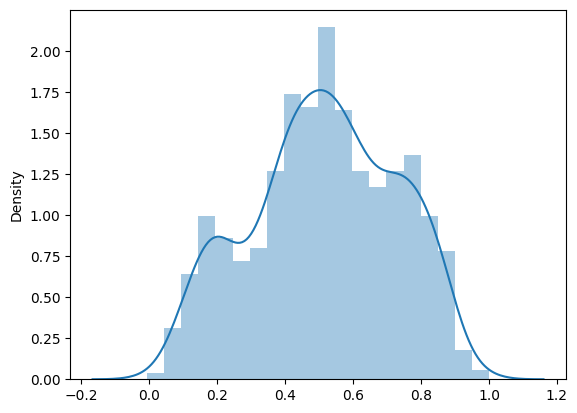

In [ ]:
fig=plt.figure()
sns.distplot((y_train,y_train_cnt),bins=20)

In [ ]:
df_test[var]=scaler.transform(df_test[var])
df_test
y_test=df_test.pop('cnt')
x_test=df_test.drop(['casual','registered'], axis=1)

In [ ]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
c=x_train_rfe2.drop('const', axis=1)
col2=c.columns

In [ ]:
x_test_rfe2=x_test[col2]
x_test_rfe2=sm.add_constant(x_test_rfe2)

In [ ]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   hum            219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    int64  
 6   mnth_Jul       219 non-null    int64  
 7   weathersit_C   219 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 15.4 KB


In [ ]:
y_pred=lm2.predict(x_test_rfe2)

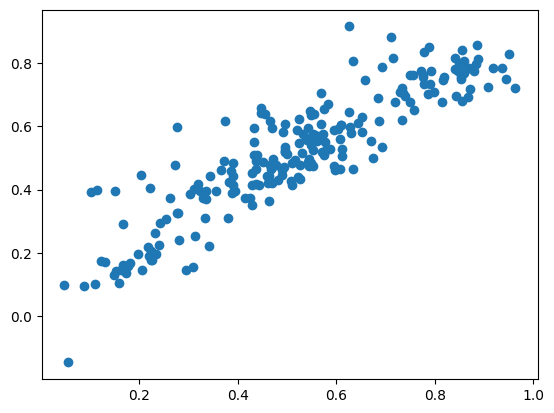

In [ ]:
plt.figure()
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.805237966729835

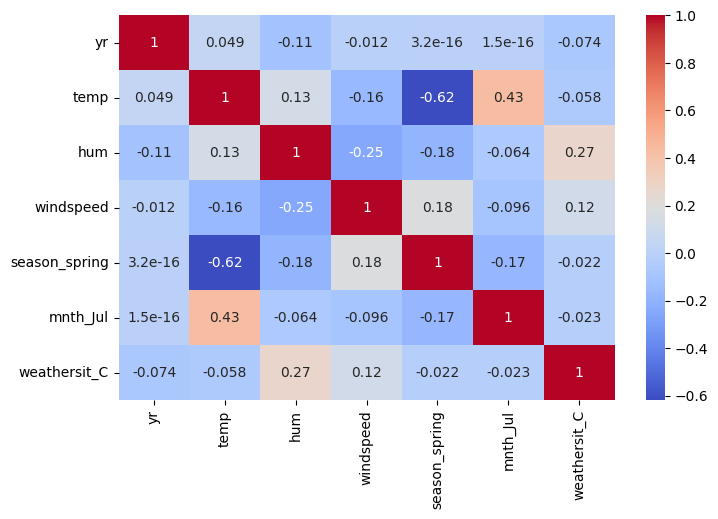

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df[col2].corr(), annot=True, cmap="coolwarm")
plt.show()